# Assignment 1

##### Question 1

1. **Training dataset**: The training dataset is the part of the total dataset that is used to train the model. It contains the input data and its labels, as well as the target values.

2. **Testing dataset**: This is the part of the overall dataset that is used to test the performance of the (now-trained) model. This is done by using this data (which has not been seen by the model yet) to run through the model in order to make predictions on the target values, and comparing the results of the models predictions to the actual target values. 

3. **Validation dataset**: This is the portion of the overall dataset that is used to fine-tune the hyperparameters of the model. It is used to evaluate the fit of the model, and change its hyperparameter configuration such that the model performs better, but it is never "learned" from. 

4. **Ground truth**: This is the actual labels or target values of the dataset. It is used to compare the predictions of the model to the actual correct answers in order to evaluate the accuracy of its predictions.

5. **Label**: This is the thing that is being predicted.

6. **Pre-processing**: This is the act of doing all the things you need to do to get the data you will eventually train your model with in the shape that you would like it to be in to train the model. Unless you are using datasets that are pre-created specifically for ML, this step will likely always be the most important, and take the most time.

7. **Feature**: This is the thing that is an input to the ML algorithm.

8. **Numerical**: This is a data point that can be counted (eg. is quantitative like horsepower in a car, or weight in a person).

9. **Nominal**: This is a data point that cannot be counted (eq. is qualitative like color)

10. **Decision Surface**: This is the separator, in a classification model, where the distinction between one class and another is made. In the following picture, it is the boundary between the orange and blue sections of the graph.
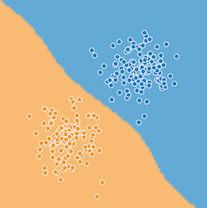

11. **Model validation**: This is the process of assessing a trained model's performance on unseen data. This is the point where you would calculate metrics like accuracy, f1 score, recall etc.

12. **Accuracy**: This is a metric that is calculated during model validation and consists of the proportion of correctly predicted things to the total number of predictions made.

13. **Cross-validation**: This is a technique for estimating how well a model would generalize to new data by testing the model against one or more subsets of data that you witheld from the training set.

14. **Hyperparameters**: These are the "cogs" of a model, like learning rate or gamma, that you would tune inbetween training runs of a model in order to make it perform better.

15. **Overfit**: This is when you train a model in such a way that it perfectly fits only the training data, and when provided with data that was not in the training set, it is no longer able to make correct predictions.

In [1]:
# Notebook-wide imports
from sklearn.datasets import load_iris, load_wine
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)

##### Question 2

In [2]:
print()
print('--------Iris-----------')
print()
iris = load_iris()

print(f'Number of data points: {iris.data.shape[0]}')
print('-----------------------')

num_features = len(iris.feature_names)
feature_types = [type(val).__name__ for val in iris.data[0]]

print("Number of features:", num_features)
print("Feature types:", feature_types)
print('-----------------------')

num_categories = len(iris.target_names)
category_names = iris.target_names

print("Number of categories:", num_categories)
print("Category names:", category_names)
print('-----------------------')

df = pd.DataFrame(data=iris.data[:, :2], columns=iris.feature_names[:2])
print(f'Mean: {df.mean()}')
print()
print('--------Wine-----------')
print()

wine = load_wine()

print(f'Number of data points: {wine.data.shape[0]}')
print('-----------------------')

num_features = len(wine.feature_names)
feature_types = [type(val).__name__ for val in wine.data[0]]

print("Number of features:", num_features)
print("Feature types:", feature_types)
print('-----------------------')

num_categories = len(wine.target_names)
category_names = wine.target_names

print("Number of categories:", num_categories)
print("Category names:", category_names)
print('-----------------------')

df = pd.DataFrame(data=wine.data[:, :2], columns=wine.feature_names[:2])
print(f'Mean: {df.mean()}')



--------Iris-----------

Number of data points: 150
-----------------------
Number of features: 4
Feature types: ['float64', 'float64', 'float64', 'float64']
-----------------------
Number of categories: 3
Category names: ['setosa' 'versicolor' 'virginica']
-----------------------
Mean: sepal length (cm)    5.843333
sepal width (cm)     3.057333
dtype: float64

--------Wine-----------

Number of data points: 178
-----------------------
Number of features: 13
Feature types: ['float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64']
-----------------------
Number of categories: 3
Category names: ['class_0' 'class_1' 'class_2']
-----------------------
Mean: alcohol       13.000618
malic_acid     2.336348
dtype: float64


##### Question 3

In [ ]:
iris_df = pd.DataFrame(
    data = np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
    columns = iris.feature_names + ['species']
)
cols = iris_df.columns.drop('species')
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue = 'species')

From these plots, I believe the petal width to petal length chart (and those corresponding features) show the most promising separation power for ML. 

In [ ]:
wine_df = pd.DataFrame(
    data = np.c_[wine.data[:, :4], [wine.target_names[v] for v in wine.target]],
    columns = wine.feature_names[:4] + ['wine_type']
)
cols = wine_df.columns.drop('wine_type')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
g = sns.pairplot(wine_df, hue = 'wine_type')

From these plots, I believe the alcohol to flavinoids chart (and those corresponding features) show the most promising separation power for ML. 

**NOTE:** I could not print more than 4 features at a time reliably with restart & run all, so I adjusted the code above to only print the first 4 features. I am able to print all of them if I execute the cell several times, but was not sure if you would do that while grading.

##### Question 4

1. I would use the petal length and petal width features.
2. Three clusters are fairly obvious in the petal length vs petal width feature pair plot
3. There are only 3 clusters as there are only 3 target classes, and they are marked roughly as:
    - setosa: from (1, 0) to (2, 0.75)
    - versicolor: from (3, 1) to (5, 1.5)
    - virginica: from (4, 1.75) to (7, 2.5)
    On the petal width vs petal length plot.
    
4. Yes, there is a relation between classification and clustering in this dataset. Clustering, I have just learned, is an unsupervised learning technique, while classification is a supervised learning task. If you use an unsupervised clustering model like GMM you will find that it finds the clusters with nearly the same accuracy as a classification task would have with the provided labels.

##### Question 5

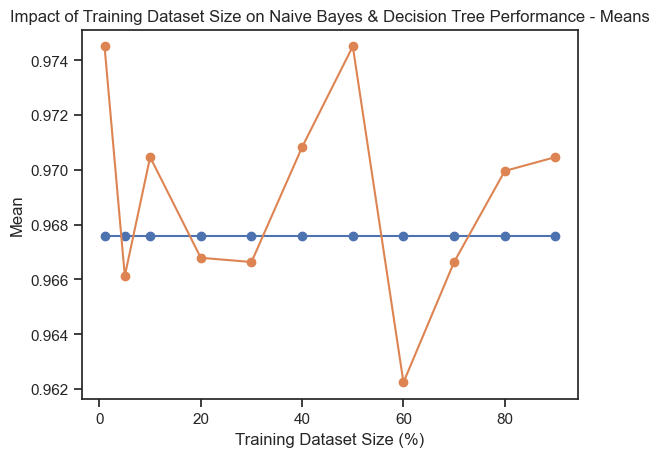

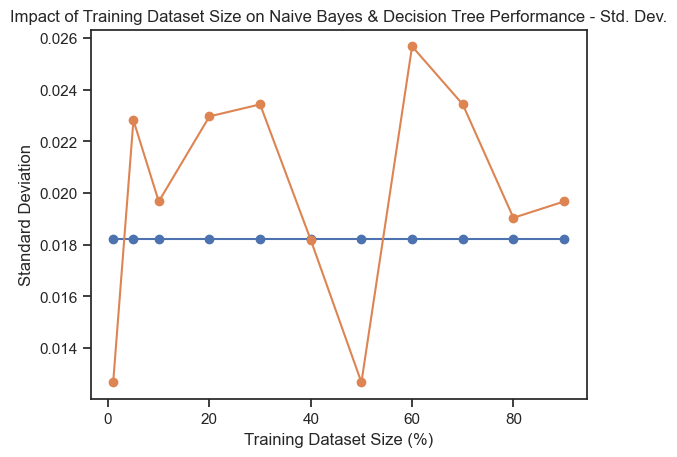

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# disables the numpy error warning coming from naieve bayes
np.seterr(divide = 'ignore', invalid='ignore')

iris = load_iris()

# Set up the two models
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()

training_splits = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

naive_bayes_means = []
decision_tree_means = []

naive_bayes_stds = []
decision_tree_stds = []

for i in range(len(training_splits)):
    #set up arrays to hold accuracy scores for each model given all training splits
    naive_bayes_accuracy_scores = []
    decision_tree_accuracy_scores = []

    for split in training_splits:
        # set up your training and test sets given each split
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data,
            iris.target,
            test_size = (100 - split),
            random_state = 1,
            shuffle = True
        )

        # fit and predict the naive bayes model
        naive_bayes.fit(X_train, y_train)
        naive_bayes_prediction = naive_bayes.predict(X_test)
        naive_bayes_accuracy_scores.append(accuracy_score(y_test, naive_bayes_prediction))

        # fit and predict the decision tree model
        decision_tree.fit(X_train, y_train)
        decision_tree_prediction = decision_tree.predict(X_test)
        decision_tree_accuracy_scores.append(accuracy_score(y_test, decision_tree_prediction))
    
    # take means of the accuracy scores and keep track of them
    naive_bayes_means.append(np.mean(np.array(naive_bayes_accuracy_scores)))
    decision_tree_means.append(np.mean(np.array(decision_tree_accuracy_scores)))
    
    # take the std. dev. of accuracy scores and keep track of them
    naive_bayes_stds.append(np.std(np.array(naive_bayes_accuracy_scores)))
    decision_tree_stds.append(np.std(np.array(decision_tree_accuracy_scores)))   

# plot both means on the same chart
plt.plot(training_splits, naive_bayes_means, marker = 'o')
plt.plot(training_splits, decision_tree_means, marker = 'o')
plt.xlabel('Training Dataset Size (%)')
plt.ylabel('Mean')
plt.title('Impact of Training Dataset Size on Naive Bayes & Decision Tree Performance - Means')
plt.show()   

# plot both stds on the same chart
plt.plot(training_splits, naive_bayes_stds, marker = 'o')
plt.plot(training_splits, decision_tree_stds, marker = 'o')
plt.xlabel('Training Dataset Size (%)')
plt.ylabel('Standard Deviation')
plt.title('Impact of Training Dataset Size on Naive Bayes & Decision Tree Performance - Std. Dev.')
plt.show()


1. I would say the NB classifer has higher performance than the DT classifer.
2. After running this many times, the general gist of the results seem to be that the DT classifer has worse performance at low train/test splits, while the NB classifer has much higher performance at low train/test splits. Towards the middle of the range of train/test splits, the performance of NB declines, while the performance of DT increases. At a 70/30 split, their performance converges, and at an 80/20 split both of them are able to predict with 100% accuracy. In this case, I would say the NB classifier has higher performance than the DT classifer.
3. The performance does plateau at an 80/20 split where both models converge on 100% prediction accuracy

For the hint: Turning on shuffle would help ensure that the model avoids bias and reduces overfitting by randomizing the data that ends up in each subset (train and test).